In [198]:
# setup
%reset -f
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
from PIL import Image
import os

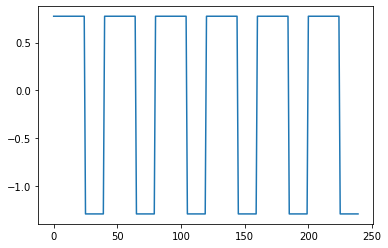

In [199]:
# Question 1.1 

AV = [0, 20, 0, 0, 0, 0]
IV = [30, 45, 60, 40, 40, 40]
ONES_DURATION = [15, 20, 25, 15, 20, 25]
N = 240
NUM_T_SOURCES = 6
tc = []
t_vector_names = ['TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6']

for vector_num in range(NUM_T_SOURCES):
    vector = []
    index = 0
    # adding in 0s while incrementing to arrival 
    while index < AV[vector_num]:
        vector.append(0)
        index += 1
    one_count = 0
    inc_count = 0
    while index < N:
        # resetting counts if an increment has been completed
        if inc_count >= IV[vector_num]:
            inc_count = 0
            one_count = 0
        if one_count < ONES_DURATION[vector_num]:
            vector.append(1)
            one_count += 1
        else:
            vector.append(0)
        # incrementing counters 
        inc_count += 1
        index += 1   
    # mean subtraction followed by division by std dev
    vector = [x - np.mean(vector) for x in vector]
    vector = [x / np.std(vector) for x in vector]
    # plotting time course
    plt.clf()
    plt.plot(range(len(vector)), vector)
    plt.savefig('../plots/1.1/tc_' + str(vector_num + 1) + '.jpeg')

    tc.append(vector)

# check matrix 
def check_vector(vector):
    prev_value = vector[0]
    count = 0
    print_list = []
    for val in vector:
        if val == prev_value:
            count += 1
        else:
            print_list.append([count, prev_value])
            count = 1
            prev_value = val
    print(print_list)

# rotating matrix so that a df can be made with dimensions 240 x 6 
tc  = zip(*reversed(tc))
tc_df = pd.DataFrame(tc, columns = t_vector_names)
tc = tc_df.to_numpy()

<Figure size 432x288 with 0 Axes>

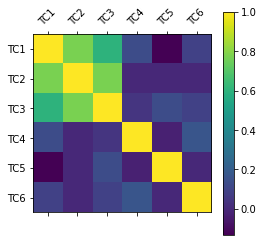

In [200]:
#Question 1.2
def get_cm(df, num_vectors, tick_labels, save_path):
    plt.clf()
    if len(df.iloc[0]) == num_vectors:
        plt.matshow(df.corr())
    else:
        plt.matshow(df.T.corr())
    plt.colorbar()
    ticks = [i for i in range(num_vectors)]
    plt.xticks(ticks, tick_labels, rotation=45)
    plt.yticks(ticks, tick_labels)
    plt.savefig(save_path)

get_cm(tc_df, NUM_T_SOURCES, t_vector_names, '../plots/1.2/CM_1.2.jpeg')    

<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

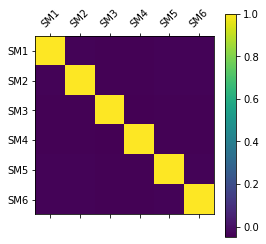

In [201]:
# Question 1.3
tmpSM = []
NUM_MAPS = 6 
MAP_WIDTH = 21
MAP_LENGTH = 21
V = 441
V_SLICE = [[2,6], [2,6], [8,13], [8,13], [15, 19], [15, 19]]
H_SLICE = [[2,6], [15,19], [2,6], [15,19], [2, 6], [15, 19]]
s_vector_names = ['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']

def plot_map(matrix, axis):
    axis.matshow(matrix)
    #axis.colorbar()
    axis.xticks(np.arange(0, MAP_WIDTH+1, 2.0))
    axis.yticks(np.arange(0, MAP_LENGTH+1, 2.0))

for matrix_num in range(NUM_MAPS):
    # creating blank matrix of 0s 
    matrix = []
    for i in range(MAP_LENGTH):
        row = []
        for j in range(MAP_WIDTH):
            row.append(0)
        matrix.append(row)
    # adding ones 
    for i in range(V_SLICE[matrix_num][0], V_SLICE[matrix_num][1]):
        for j in range(H_SLICE[matrix_num][0], H_SLICE[matrix_num][1]):
            matrix[i][j] = 1
    # plotting map
    plt.clf()
    plot_map(matrix, plt)
    plt.savefig('../plots/1.3/sm_' + str(matrix_num + 1) + '.jpeg')

    tmpSM.append(matrix)

def get_column(matrix, col_num):
    """Retrivies column col_num from matrix"""
    col = []
    for row in matrix:
        col.append(row[col_num])
    return col

# reshaping array column wise 
sm = []
for matrix_num in range(NUM_MAPS):
    sm.append(np.reshape(tmpSM[matrix_num], V))

sm_df = pd.DataFrame(sm, columns = range(1, V+1))
get_cm(sm_df, NUM_MAPS, s_vector_names, '../plots/1.3/CM_1.3.jpeg')

/home/hjthorpe/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hjthorpe/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

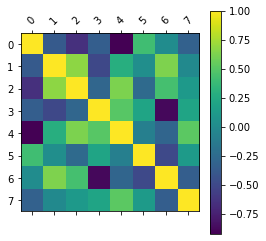

In [202]:
# Question 1.4
T_NOISE_VAR = 0.25
S_NOISE_VAR = 0.015
MEAN = 0
np.random.seed(0)

def get_noise(width, length, mean, var):
    gamma = []
    noise = list(np.random.normal(mean, np.sqrt(var), size=length*width))
    index = 0 
    for i in range(length):
        vector = []
        for j in range(width):
            vector.append(noise[index])
            index += 1
        gamma.append(vector)
    return gamma, noise

# generating temporal noise, correlation matrix and histogram
gamma_t, t_noise = get_noise(NUM_T_SOURCES, N, MEAN, T_NOISE_VAR)
gamma_t_df = pd.DataFrame(gamma_t,  columns = t_vector_names)
get_cm(gamma_t_df, NUM_T_SOURCES, ['N_TC1', 'N_TC2', 'N_TC3', 'N_TC4', 'N_TC5', 'N_TC6'], '../plots/1.4/time_noise_cm.jpeg')
plt.clf()
sns.distplot(t_noise)
plt.savefig('../plots/1.4/time_noise_hist.jpeg')

# generating spacial noise, correlation matrix and histogram
gamma_s, s_noise = get_noise(V, NUM_MAPS, MEAN, S_NOISE_VAR)
gamma_s_df = pd.DataFrame(gamma_s,  columns = range(1, V+1))
get_cm(gamma_t_df, NUM_MAPS, ['N_SM1', 'N_SM2', 'N_SM3', 'N_SM4', 'N_SM5', 'N_SM6'], '../plots/1.4/space_noise_cm.jpeg')
plt.clf()
sns.distplot(t_noise)
plt.savefig('../plots/1.4/space_noise_hist.jpeg')

# product of Gamma t and Gamma s (displaying subset)
SUBSET_LENGTH = 8
noise_product = np.dot(gamma_t_df, gamma_s_df)
prod_subset = []
for i in range(SUBSET_LENGTH):
    row = list(noise_product[i])[0:SUBSET_LENGTH]
    prod_subset.append(row)
get_cm(pd.DataFrame(prod_subset, columns=range(SUBSET_LENGTH)), SUBSET_LENGTH, [str(x) for x in range(8)], '../plots/1.4/noise_product_cm.jpeg')


441


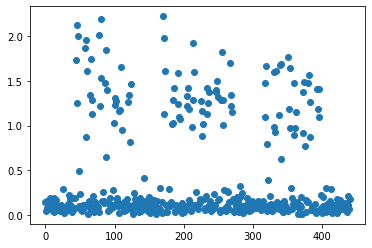

In [203]:
# Question 1.5 
left = (tc_df.add(gamma_t_df))
right = (sm_df.add(gamma_s_df))

X = np.dot(left, right)

# checking if TC x Gamma_s and Gamma_t x SM exists
tc_space_noise_product = np.dot(tc_df, gamma_s_df)
sm_time_noise_product = np.dot(gamma_t_df, sm_df)

# plotting 100 random series 
time_series_for_plot = random.sample(range(len(X[0])), 100)
plt.clf()
for time_series_num in time_series_for_plot:
    time_series = []
    for row in X:
        time_series.append(row[time_series_num])
    plt.plot(range(len(time_series)), time_series)
plt.savefig('../plots/1.5/random_time_series.jpeg')

# plotting variances of variables
vars = []
for variable in range(len(X[0])):
    var = np.var(get_column(X, variable))
    vars.append(var)
plt.clf()
print(len(vars))
plt.scatter(range(len(vars)), vars)
plt.savefig('../plots/1.5/variances.jpeg')

# TODO standardaize question
#X_standardized = []
for col_num in range(len(X[0])):
    col = get_column(X, col_num)
    col = [c - np.mean(col) for c in col]
    col = [c / np.std(col) for c in col]

    for row_num in range(len(col)):
        X[row_num][col_num] = col[row_num]
    #X_standardized.append(col)


(6, 441)
6
(240, 6)
240


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

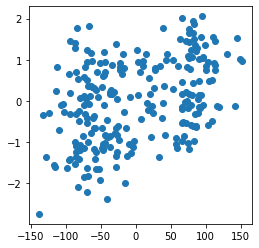

In [204]:
# Question 2.1 
D = tc_df
A = sm_df
A_LSR = np.dot(np.dot((np.linalg.inv(np.dot(D.transpose(), D))), D.transpose()), X)
D_LSR = np.dot(X, A_LSR.transpose())

# plotting retrieved sources
print(A_LSR.shape)
print(len(A_LSR))
print(D_LSR.shape)
print(len(D_LSR))

for retrieved in range(NUM_MAPS):
    # getting plot of map 
    sm = A_LSR[retrieved]
    # rearranging map into matrix
    map_matrix = []
    for i in range(MAP_LENGTH):
        row = []
        for j in range(MAP_WIDTH):
            row.append(sm[(i * MAP_WIDTH) + j])
        map_matrix.append(row)
    # plotting map
    plt.clf()
    plot_map(map_matrix, plt)
    plt.title('Retrieved Spatial Map ' + str(retrieved + 1))
    map_path = '../plots/2.1/map' + str(retrieved + 1) + '.jpeg'
    plt.savefig(map_path)

    # geting time course 
    time_series = []
    for row in X:
        time_series.append(row[retrieved])
    # plotting time course   
    plt.clf()
    plt.plot(range(len(time_series)), time_series)
    plt.title('Retrieved Time Course ' + str(retrieved + 1))
    time_path = '../plots/2.1/time' + str(retrieved + 1) + '.jpeg'
    plt.savefig(time_path)

    # combining subplots
    images = [Image.open(x) for x in [map_path, time_path]]
    widths, heights = zip(*(i.size for i in images))
    new_img = Image.new('RGB', (sum(widths), max(heights)))
    x_offset = 0
    for img in images:
        new_img.paste(img, (x_offset,0))
        x_offset += img.size[0]
    new_img.save('../plots/2.1/retrieved_' + str(retrieved + 1) + '.jpg')
    
    #removing temporary subplots
    os.remove(map_path)
    os.remove(time_path)


# Scatter plot of 3rd column of D_lSR and 30th column of standardized X
# TODO 
plt.clf()
plt.scatter(get_column(D_LSR, 2), get_column(X, 30))
plt.savefig('../plots/2.1/D_LSR_3rdCol_vs_X_30thCol.jpeg')
# Scatter plot of 4th column of D_lSR and 30th column of standardized X
plt.clf()
plt.scatter(get_column(D_LSR, 3), get_column(X, 29))
plt.savefig('../plots/2.1/D_LSR_4thCol_vs_X_30thCol.jpeg')

Chosen value for lambda:  0.25
Sum of c_TRR 5.261085599501388
Sum of c_TLSR 5.258616078639658


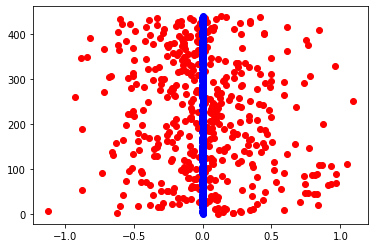

In [205]:
# Question 2.2

def get_corr(TC, D):
    """returns a vector only retaining maximum absolute correlations between TC and D"""
    c =[]
    for col_num_tc in range(len(TC[0])):
        corr_vector = []
        col_tc = get_column(TC, col_num_tc)
        for col_num_d in range(len(D[0])):
            col_d = get_column(D, col_num_d)
            corr_vector.append(abs(np.corrcoef(col_tc, col_d)[0][1]))
        c.append(max(corr_vector))
    return c

def get_A_RR(lambda_val):
    """Returns ridge regression paramater for A based on lambda_val"""
    return np.dot(np.dot((np.linalg.inv(np.dot(D.transpose(), D) + (lambda_val * np.identity(NUM_MAPS)))), D.transpose()), X)

# guess and checking for optimal value of lambda by maximising sum of c_TRR
max_corr_sum = 0
max_lambda = 0
for val in range(1, 101):
    val = val / 100 # to make lambda between 0 and 1 
    lambda_tilde = val * V # gets lambda tilde
    A_RR = get_A_RR(lambda_tilde)
    D_RR = np.dot(X, A_RR.transpose())

    temp_sum = sum(get_corr(tc, D_RR))
    if temp_sum > max_corr_sum:
        max_corr_sum = temp_sum
        max_lambda = val

# performing operations with optimal lambda
A_RR = get_A_RR(max_lambda)
D_RR = np.dot(X, A_RR.transpose())
c_TLSR = get_corr(tc, D_LSR)
c_TRR = get_corr(tc, D_RR)

print('Chosen value for lambda: ', max_lambda)
print('Sum of c_TRR', sum(c_TRR))
print('Sum of c_TLSR', sum(c_TLSR))

# plotting first vector from A_RR and A_LSR for lambda=1000
lambda_tilde_1000 = 1000 * V
A_RR_1000 = get_A_RR(lambda_tilde_1000)
plt.clf()
plt.scatter(A_LSR[0], range(len(A_LSR[0])), c='r')
plt.scatter(A_RR_1000[0], range(len(A_RR_1000[0])), c='b')
plt.savefig('../plots/2.2/first_vector.jpeg')

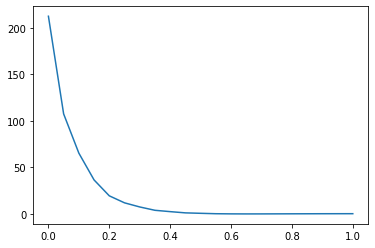

min mse value:  0.148073195690435
pho value selected:  0.65


In [206]:
# Question 2.3
from sklearn.metrics import mean_squared_error

def get_Alr(X, N, nsrcs, x1, x2, rho):
    """The code below was adapted from the R Code for LR from the specs"""
    np.dot
    step = 1/(np.linalg.norm(np.dot(tc, tc.T) * 1.1))
    thr = rho * N * step
    Ao = np.zeros(nsrcs)
    A = np.zeros(nsrcs)
    Alr = np.zeros((nsrcs, x1 * x2))

    for k in range(x1 * x2):
        A = Ao + step * ( np.dot(tc.T, (get_column(X, k) - (np.dot(tc, Ao)))))
        A = (1/(1+thr)) * (np.sign(A) * np.maximum(np.repeat([0], nsrcs), abs(A) - thr))
        # TODO pmax
        for i in range(10): 
            Ao = A
            A = Ao + step * (np.dot(tc.T, (get_column(X, k) - (np.dot(tc, Ao)))))
            A = (1/(1+thr)) * (np.sign(A) * np.maximum(np.repeat([0], nsrcs), abs(A)-thr))
        
        for row_num in range(len(Alr)):
            Alr[row_num][k] = A[row_num]
        #Alr[,k] = A

    return Alr

def get_mse(X, Alr, Dlr):
    #return np.square(np.subtract(X, np.dot(Alr, Dlr))).mean()
    return mean_squared_error(X, np.dot(Dlr, Alr))

mse_lst = []
pho_array = np.arange(0, 1.05, 0.05)
for pho in pho_array:
    pho = round(pho, 2)
    mse_total = 0
    for i in range (10):
        # generating new noise
        gamma_t, t_noise = get_noise(NUM_T_SOURCES, N, MEAN, T_NOISE_VAR)
        gamma_t_df = pd.DataFrame(gamma_t,  columns = t_vector_names)
        gamma_s, s_noise = get_noise(V, NUM_MAPS, MEAN, S_NOISE_VAR)
        gamma_s_df = pd.DataFrame(gamma_s,  columns = range(1, V+1))
        # getting new x
        left = (tc_df.add(gamma_t_df))
        right = (sm_df.add(gamma_s_df))
        X_new = np.dot(left, right)
        # getting lasso estimates and mse
        Alr = get_Alr(X_new, N, 6, 21, 21, pho)
        Dlr = np.dot(X_new, Alr.T)
        mse_total += get_mse(X_new, Alr, Dlr)
    mse_lst.append(mse_total/10)

plt.clf()
plt.plot(pho_array, mse_lst)
plt.show()

min_mse = min(mse_lst)
print("min mse value: ", min_mse)
for i in range(len(pho_array)):
    if mse_lst[i] == min_mse:
        pho = pho_array[i]
        print("pho value selected: ", pho)
        break

In [207]:
# Question 2.4
# Estimating LR parameters
Alr = get_Alr(X, N, 6, 21, 21, pho)
Dlr = np.dot(X, Alr.T)

# getting correlation vectors
c_TRR = get_corr(tc, D_RR)
c_SRR = get_corr(sm_df.to_numpy(), A_RR)
c_TLR = get_corr(tc, Dlr)
c_SLR = get_corr(sm_df.to_numpy(), Alr)
print("c_TRR sum: ", sum(c_TRR))
print("c_TLR sum: ", sum(c_TLR))
print()
print("c_SRR sum: ", sum(c_SRR))
print("c_SLR sum: ", sum(c_SLR))


TypeError: object of type 'numpy.float64' has no len()

In [210]:
# Question 2.5 
print(SM)

[[ 0.77459667  1.          1.29099445  1.18321596 -0.84515425  1.        ]
 [ 0.77459667  1.          1.29099445  1.18321596 -0.84515425  1.        ]
 [ 0.77459667  1.          1.29099445  1.18321596 -0.84515425  1.        ]
 ...
 [-1.29099445 -1.         -0.77459667 -0.84515425 -0.84515425 -1.        ]
 [-1.29099445 -1.         -0.77459667 -0.84515425 -0.84515425 -1.        ]
 [-1.29099445 -1.         -0.77459667 -0.84515425 -0.84515425 -1.        ]]
